## 2020 Strava Data

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import datetime
import time
import math
import matplotlib.dates as mdates
from matplotlib import (pyplot as plt, figure)
from matplotlib.dates import DateFormatter

In [2]:
data = pd.read_csv('strava_activities.csv')
data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
0,2072190142,"Jan 12, 2019, 2:12:53 AM",15 min Warm Up Ride with Matt Wilpers,Ride,15 min Warm Up Ride from 7/30/18. Taken by Bar...,898,6.50,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2072241624,"Jan 12, 2019, 4:17:01 AM",20 min Beginner Ride with Ally Love,Ride,20 min Beginner Ride from 8/16/18. Taken by Ba...,1198,8.51,64.0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2072245177,"Jan 12, 2019, 4:39:17 AM",5 min Post-Ride Stretch with Ally Love,Workout,5 min Post-Ride Stretch from 12/20/18. Taken b...,300,0.00,1.0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2074689362,"Jan 13, 2019, 3:31:15 AM",5 min Post-Ride Stretch with Robin Arzon,Workout,5 min Post-Ride Stretch from 11/9/18. Taken by...,294,0.00,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2074693898,"Jan 13, 2019, 3:37:26 AM",5 min Glutes & Legs Stretch with Ally Love,Workout,5 min Glutes & Legs Stretch from 11/20/18. Tak...,300,0.00,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean Up Data

In [3]:
# select columns
selected_columns = ['Activity Date', 'Elapsed Time', 'Distance', 'Relative Effort', 'Distance']
data_filtered = data[selected_columns].copy()
data_filtered = data_filtered.loc[:,~data_filtered.columns.duplicated()]

# remove empty rides
data_filtered.query('Distance > 0',  inplace=True)

# convert time to minutes
data_filtered['Elapsed Time'] = data_filtered['Elapsed Time'].div(60).astype(int)

# convert distance to miles
data_filtered['Distance'] = data_filtered['Distance'].div(1.609344).round(1)

# remove decimal on relative
# data_filtered['Relative Effort'] = data_filtered['Relative Effort'].astype(str).str[:-2]
# data_filtered['Relative Effort'] = data_filtered['Relative Effort'].astype(float)
# data_filtered['Relative Effort'] = pd.to_numeric(data_filtered['Relative Effort'] ,errors='coerce')
# data_filtered['Relative Effort']

data_filtered.tail()

,Activity Date,Elapsed Time,Distance,Relative Effort
332,"Jan 18, 2021, 7:17:29 PM",97,3.8,NaN
333,"Jan 18, 2021, 11:51:41 PM",97,7.1,NaN
334,"Jan 21, 2021, 11:19:17 PM",29,6.2,NaN
335,"Jan 23, 2021, 8:47:49 PM",130,22.3,400.0
336,"Jan 25, 2021, 11:39:49 PM",48,4.4,17.0


## Filter Data to 2020

In [4]:
# convert date column to time object
data_filtered['Activity Date'] = pd.to_datetime(data_filtered['Activity Date'])

# filter out non 2020 dates
df = data_filtered[(data_filtered['Activity Date'].dt.year == 2020)]

df.tail(10)

,Activity Date,Elapsed Time,Distance,Relative Effort
312,2020-11-19 03:50:42,44,13.7,166.0
313,2020-11-21 21:14:26,148,20.6,267.0
314,2020-11-26 19:08:36,80,12.9,262.0
315,2020-11-29 17:38:07,29,9.5,65.0
316,2020-12-19 16:52:57,44,13.6,173.0
317,2020-12-20 20:53:48,64,5.8,15.0
318,2020-12-23 21:03:18,146,23.8,370.0
319,2020-12-25 19:01:22,74,6.5,22.0
320,2020-12-29 21:49:39,100,13.5,255.0
321,2020-12-31 18:27:19,59,19.0,179.0


## Plot data

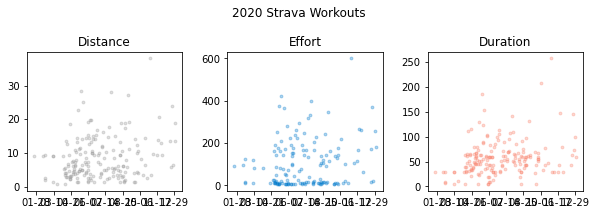

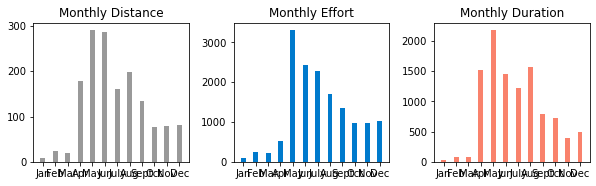

In [5]:
# setup summary
summary = df.copy()
summary['Activity Date'] = pd.to_datetime(summary['Activity Date'])
summary.index = summary['Activity Date'] 
summary = summary.resample('M').sum()

# daily
daily_x = df['Activity Date']
daily_y1 = df['Distance']
daily_y2 = df['Relative Effort']
daily_y3 = df['Elapsed Time']

# summary
summary_x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
summary_y1 = summary['Distance']
summary_y2 = summary['Relative Effort']
summary_y3 = summary['Elapsed Time']

# figure
fig,(daily_ax1, daily_ax2, daily_ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8.5,3))
fig2,(summary_ax1, summary_ax2, summary_ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8.5,3))
fig.suptitle('2020 Strava Workouts')
fig.tight_layout(rect=[0, 0, 1, 0.84])
fig2.tight_layout(rect=[0, 0, 1, 0.84])

# daily scatter
daily_ax1.scatter(daily_x, daily_y1, s=8, c='#99999950', label='Distance')
daily_ax2.scatter(daily_x, daily_y2, s=8, c='#007acc50', label='Relative Effort')
daily_ax3.scatter(daily_x, daily_y3, s=8, c='#f9826c50', label='Elapsed Time')
daily_ax1.set_title('Distance')
daily_ax2.set_title('Effort')
daily_ax3.set_title('Duration')

# summary bars
summary_ax1.bar(summary_x, summary_y1, width=0.4, color='#999999')
summary_ax2.bar(summary_x, summary_y2, width=0.4, color='#007acc')
summary_ax3.bar(summary_x, summary_y3, width=0.4, color='#f9826c')
summary_ax1.set_title('Monthly Distance')
summary_ax2.set_title('Monthly Effort')
summary_ax3.set_title('Monthly Duration')

date_form = DateFormatter("%m-%d")
daily_ax1.xaxis.set_major_formatter(date_form)
daily_ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=6))
daily_ax2.xaxis.set_major_formatter(date_form)
daily_ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=6))
daily_ax3.xaxis.set_major_formatter(date_form)
daily_ax3.xaxis.set_major_locator(mdates.WeekdayLocator(interval=6))

In [6]:
highest = df.sort_values(by='Elapsed Time', ascending=False)
highest

,Activity Date,Elapsed Time,Distance,Relative Effort
308,2020-10-31 16:19:39,257,38.1,600.0
303,2020-10-07 21:55:01,208,8.3,217.0
187,2020-05-15 17:46:41,186,28.4,424.0
192,2020-05-21 20:21:16,154,25.0,364.0
313,2020-11-21 21:14:26,148,20.6,267.0
...,...,...,...,...
201,2020-05-31 23:37:15,4,1.5,5.0
203,2020-06-01 00:04:59,4,1.2,7.0
131,2020-03-07 22:11:36,4,1.2,10.0
297,2020-09-23 19:37:00,4,1.2,11.0
